<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>

In [3]:
data = pd.read_csv('asset_price_data.csv')

In [4]:
data

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [5]:
data.head(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [6]:
data.sample(5)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
345,2020-04-29,246.6500,64.277,28.333886,305.49,38.015
93,2019-05-13,236.7456,62.490,28.885001,316.18,52.430
674,2021-08-03,255.3431,95.860,36.288341,344.07,65.340
573,2021-03-15,252.9800,85.915,32.564883,339.24,59.540
211,2019-10-24,251.0453,66.350,31.416168,326.17,51.840


In [7]:
data.shape

(783, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [9]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as index
data.set_index('date', inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 783 entries, 2019-01-02 to 2021-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Asset1  770 non-null    float64
 1   Asset2  770 non-null    float64
 2   Asset3  770 non-null    float64
 3   Asset4  734 non-null    float64
 4   Asset5  763 non-null    float64
dtypes: float64(5)
memory usage: 36.7 KB


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Asset1,770.0,248.980188,6.845006,229.701200,246.868050,250.685350,253.379275,259.110
Asset2,770.0,76.112381,13.642823,48.516000,64.786250,72.003000,88.973000,104.663
Asset3,770.0,31.473296,3.304415,22.895066,29.281948,30.651198,33.757265,39.115
Asset4,734.0,327.356880,13.487611,272.790000,318.765000,326.665000,340.155000,345.710
Asset5,763.0,54.123198,8.185047,37.340000,49.120000,52.720000,59.500000,71.050


<h2 style="color: #008080;">Copy as best practices</h2>

In [12]:
df=data.copy()

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [13]:
df.head(5)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2019-01-04,230.4026,56.129,26.147133,301.77,51.38
2019-01-07,230.0543,56.838,25.955277,302.33,52.14
2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [14]:
df.isnull().sum() 

Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

<h2 style="color: #008080;">Feature Selection (Dropping unnecesary features)</h2>

In [15]:
df.dropna(thresh=4,inplace=True) 

In [16]:
df.fillna(method='ffill',inplace=True) # fill Nan values with privous value

In [17]:
df.shape

(767, 5)

<h2 style="color: #008080;">Checking Null Values</h2>

In [18]:
df.isnull().sum() 

Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

<h2 style="color: #008080;">Checking Duplicates</h2>

In [19]:
df.duplicated().sum()

0

In [20]:
df

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2019-01-04,230.4026,56.129,26.147133,301.77,51.38
2019-01-07,230.0543,56.838,25.955277,302.33,52.14
2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...
2021-12-27,249.9207,103.956,38.820000,342.40,70.11
2021-12-28,249.9368,104.526,39.115000,342.40,70.03
2021-12-29,248.7215,104.360,38.855000,342.46,69.81


<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

In [21]:
df.eq(" ").sum()

Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [22]:
#<h2 style="color: #008080;">Moving our target to the right</h2>

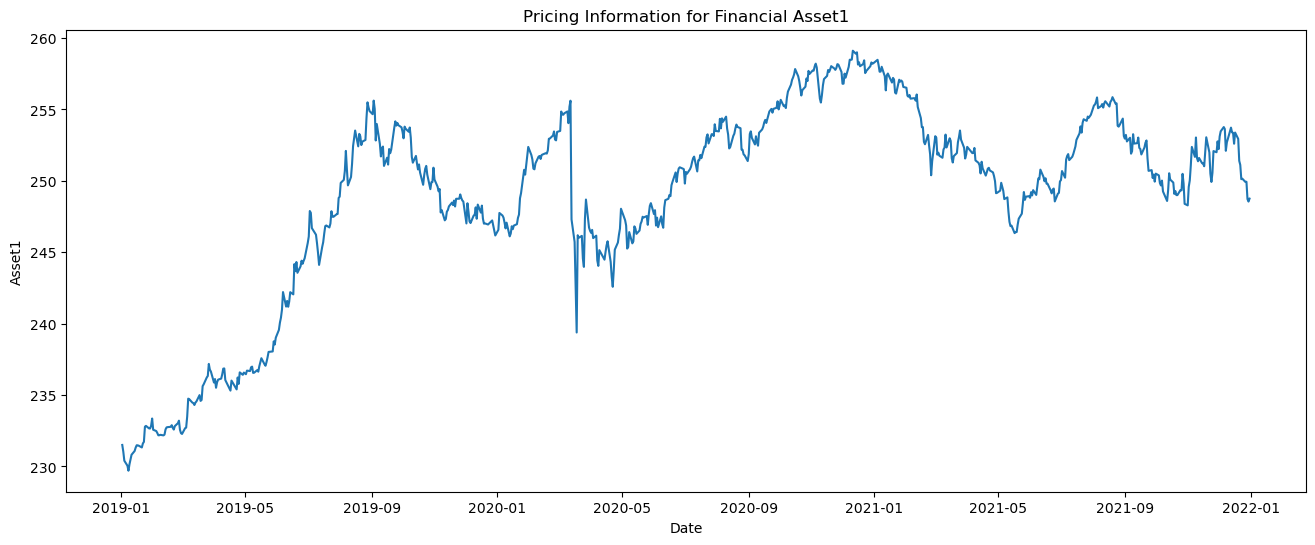

In [23]:
# Setting the size of the plot
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Asset1'])  # As'date' is the index
plt.xlabel("Date")
plt.ylabel("Asset1")
plt.title("Pricing Information for Financial Asset1")
plt.show()



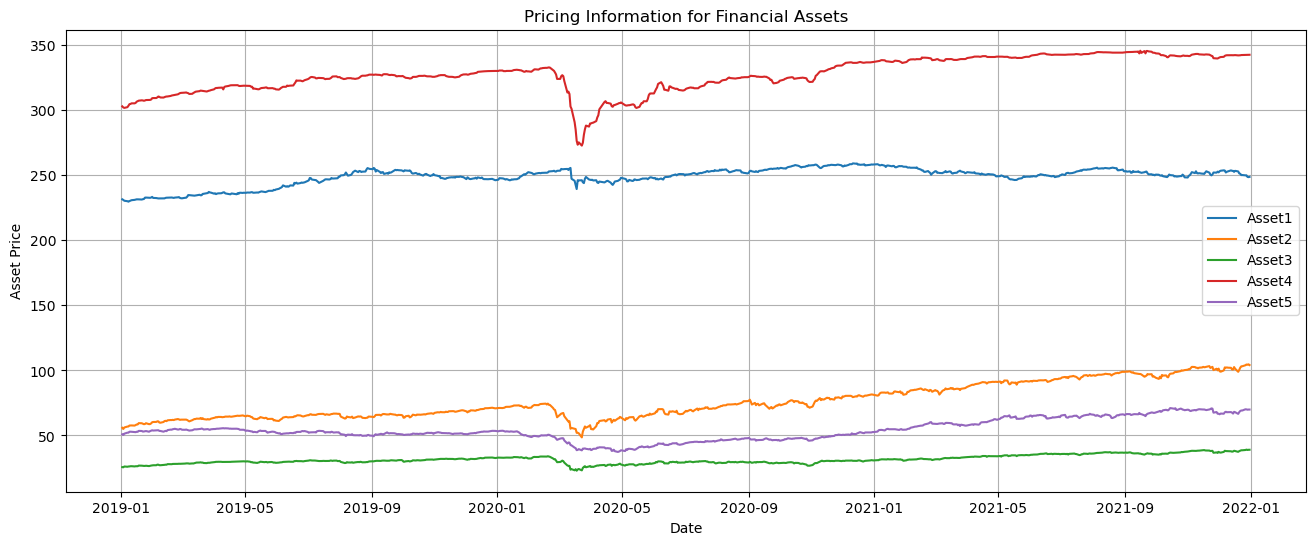

In [24]:
# Setting the size of the plot
plt.figure(figsize=(16, 6))

# Loop through each asset column and plot it
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel("Date")
plt.ylabel("Asset Price")
plt.title("Pricing Information for Financial Assets")
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Normalize asset prices to start at a uniform value
data_normalized = df.divide(df.iloc[0])

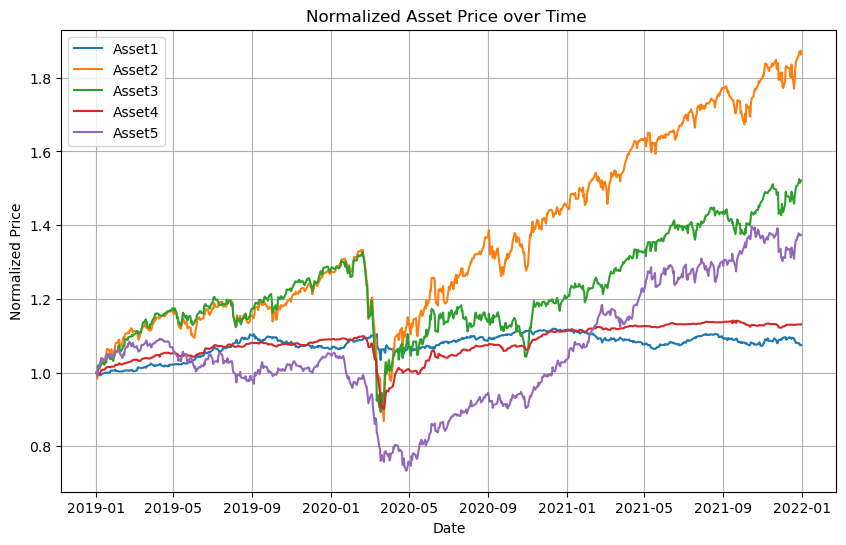

In [26]:
# Plot the time series graph
plt.figure(figsize=(10, 6))
for column in data_normalized.columns:
    plt.plot(data_normalized.index, data_normalized[column], label=column)

plt.title('Normalized Asset Price over Time ')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #c200eb;">Insights:</h2>


Asset 1 (orange line) is getting more expensive than the Asset 3 and 5 (purple & green line) and Asset 1 and 4 (blue &red line) have a very stable price in the analysis period.

In [68]:
# Convert index to datetime
data_normalized.index = pd.to_datetime(data_normalized.index)

# Extract year and month from the index
data_normalized['year'] = data_normalized.index.year
data_normalized['month'] = data_normalized.index.strftime('%b')

# Display the first few rows of the DataFrame
data_normalized.sample(5)

,Asset1,Asset2,Asset3,Asset4,Asset5,year,month
date,,,,,,,
2021-04-12,1.085318,1.608107,1.310439,1.126399,1.145805,2021,Apr
2021-06-21,1.076984,1.644528,1.398598,1.131119,1.245628,2021,Jun
2021-04-29,1.076139,1.633754,1.327031,1.126003,1.223620,2021,Apr
2021-03-26,1.092350,1.536698,1.285645,1.120061,1.145019,2021,Mar
2021-04-19,1.081466,1.624161,1.333134,1.127488,1.184516,2021,Apr


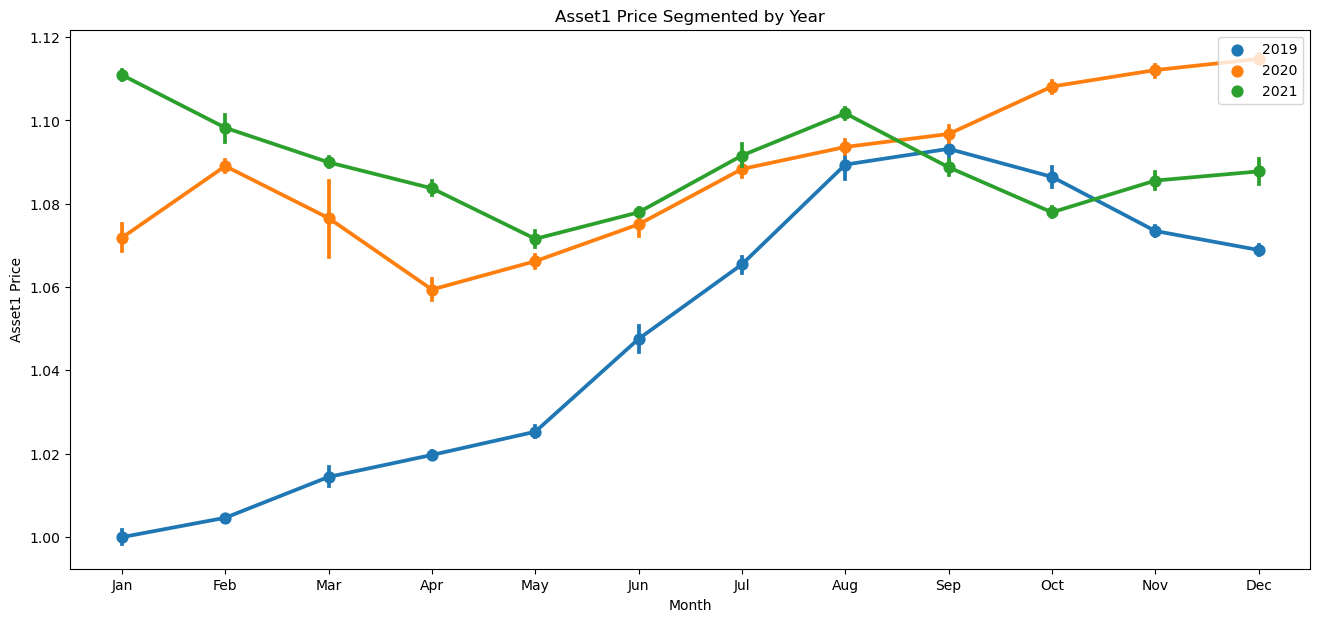

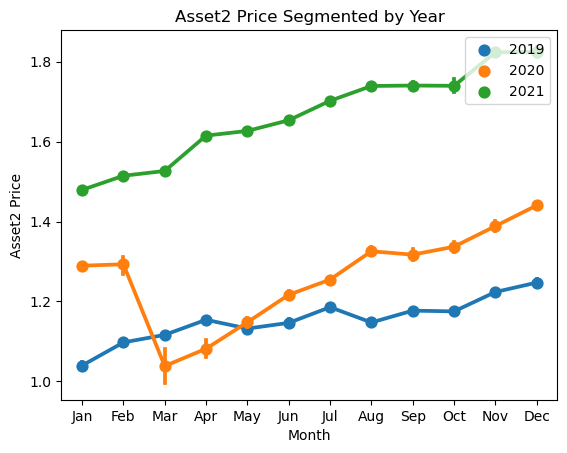

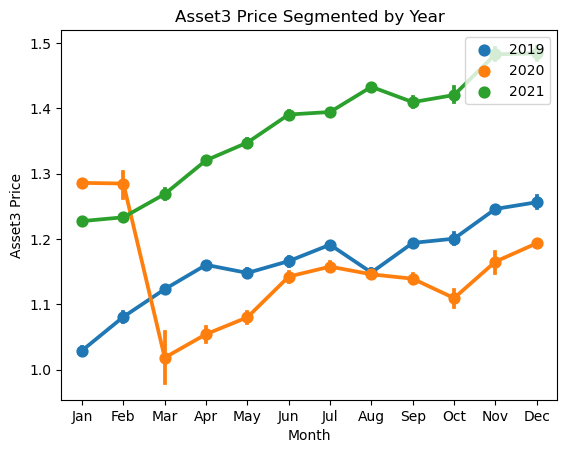

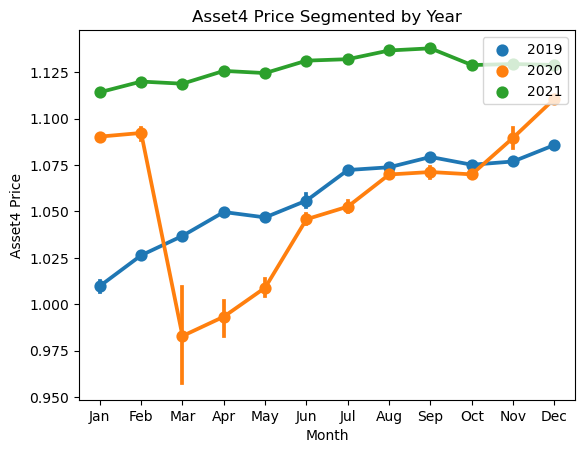

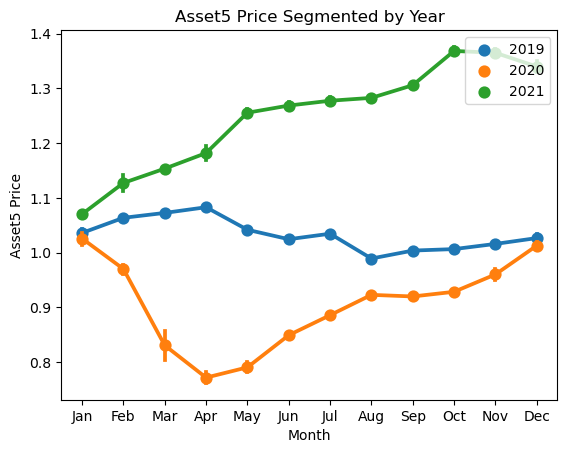

In [69]:
plt.figure(figsize=(16, 7))

# Iterate over each asset column
for asset in data_normalized.columns[:-2]:  
    # Create point plot for the current asset
    sns.pointplot(x="month", y=asset, hue="year", data=data_normalized)
    plt.xlabel("Month")
    plt.ylabel(f"{asset} Price")
    plt.title(f"{asset} Price Segmented by Year")
    plt.legend(loc='upper right')
    plt.show()  # Show plot for each asset

<Figure size 1600x700 with 0 Axes>

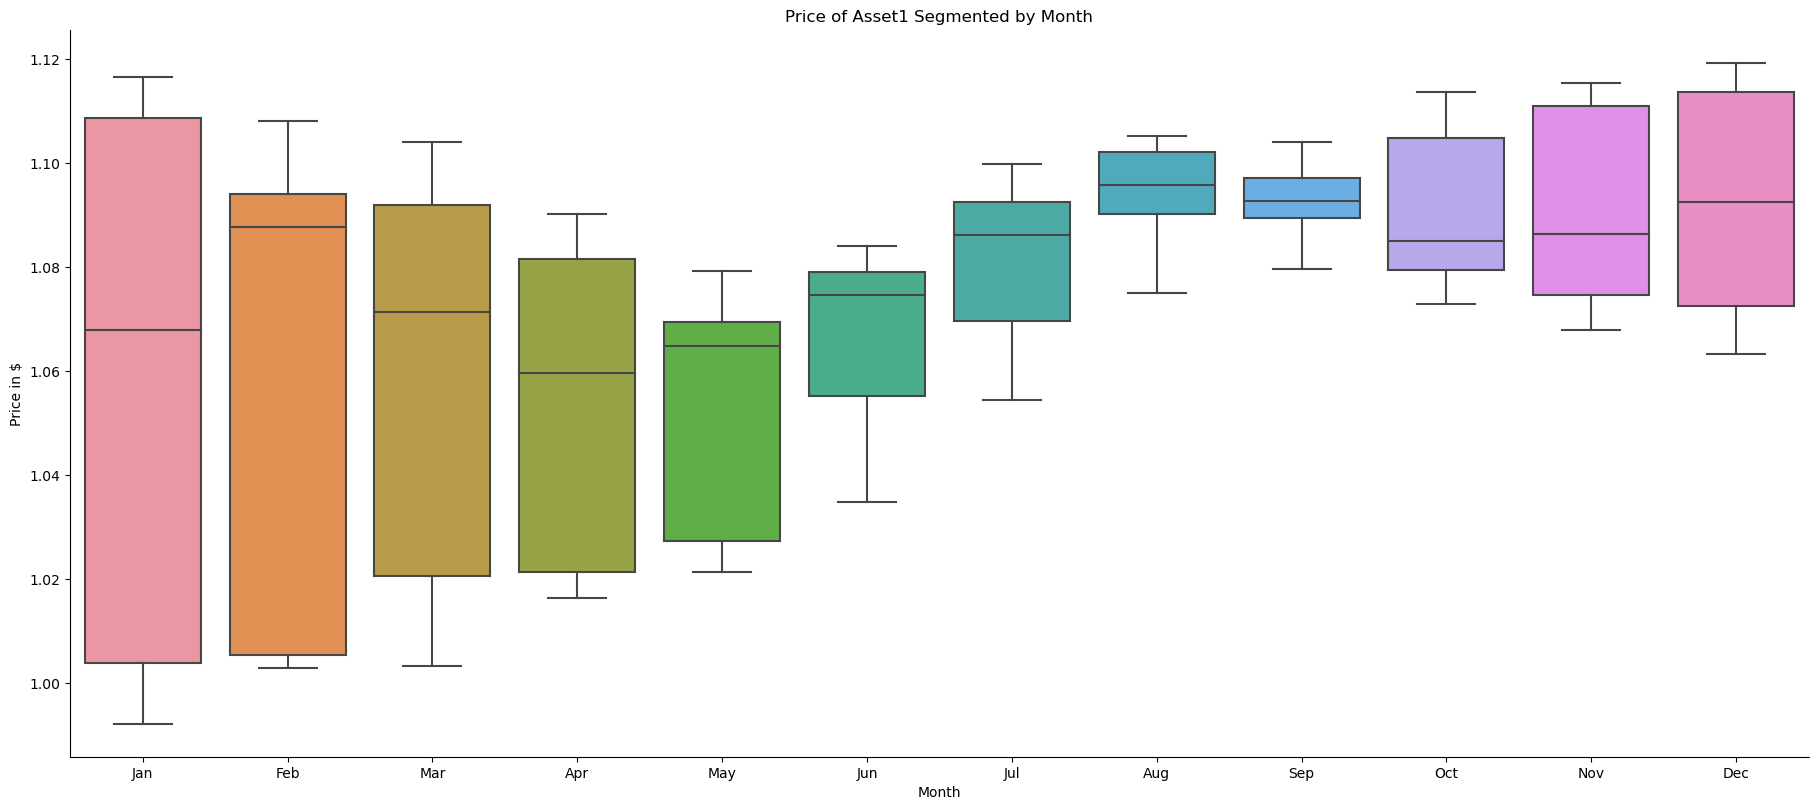

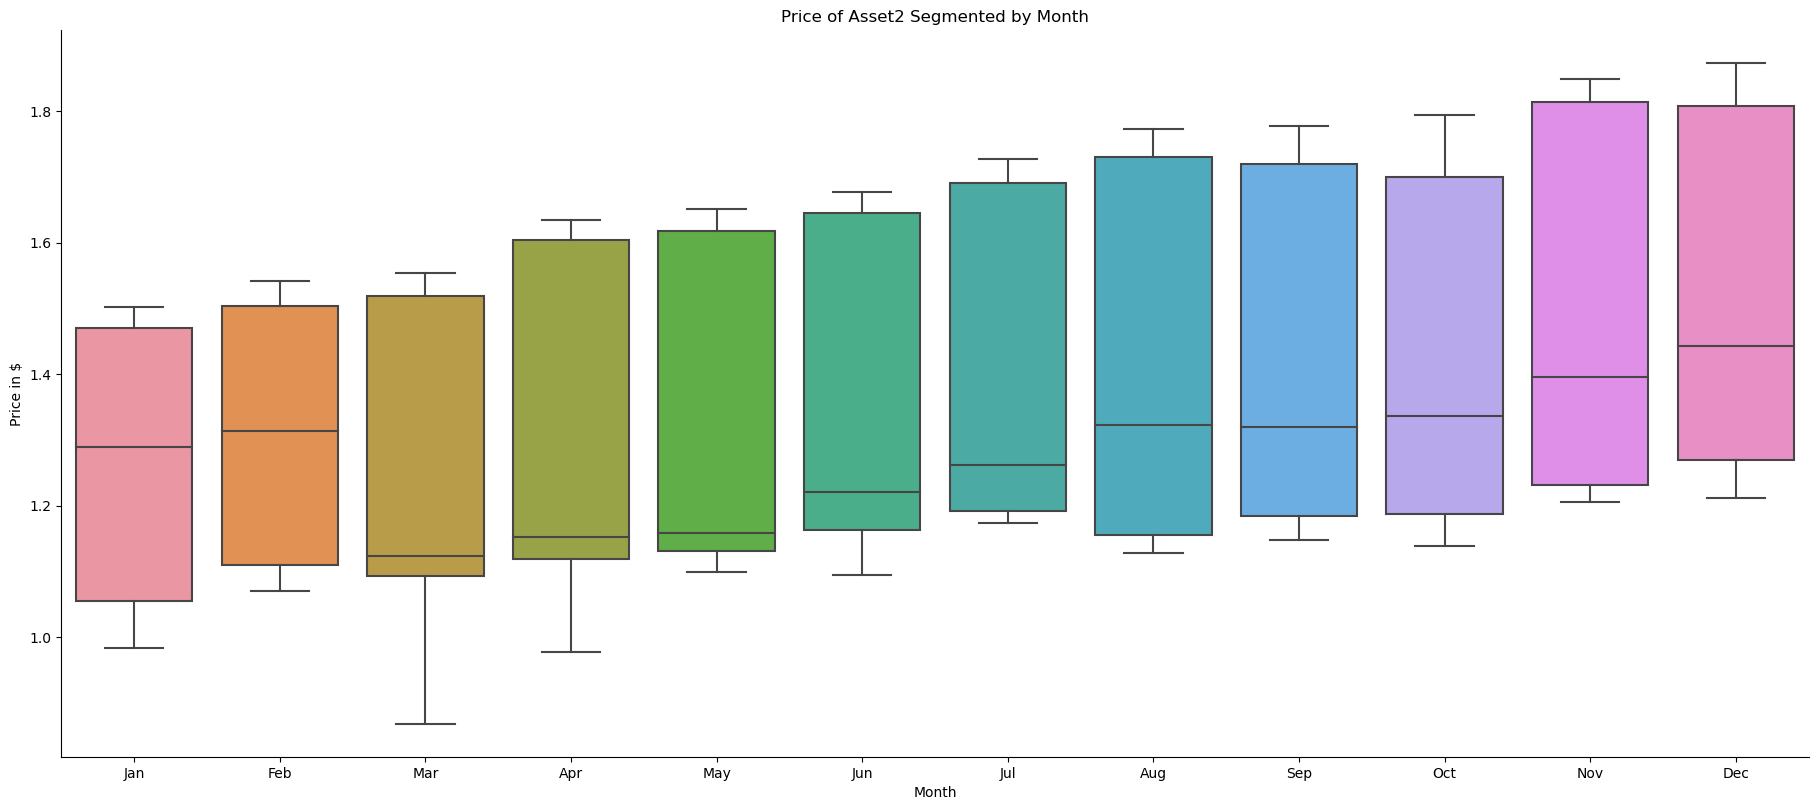

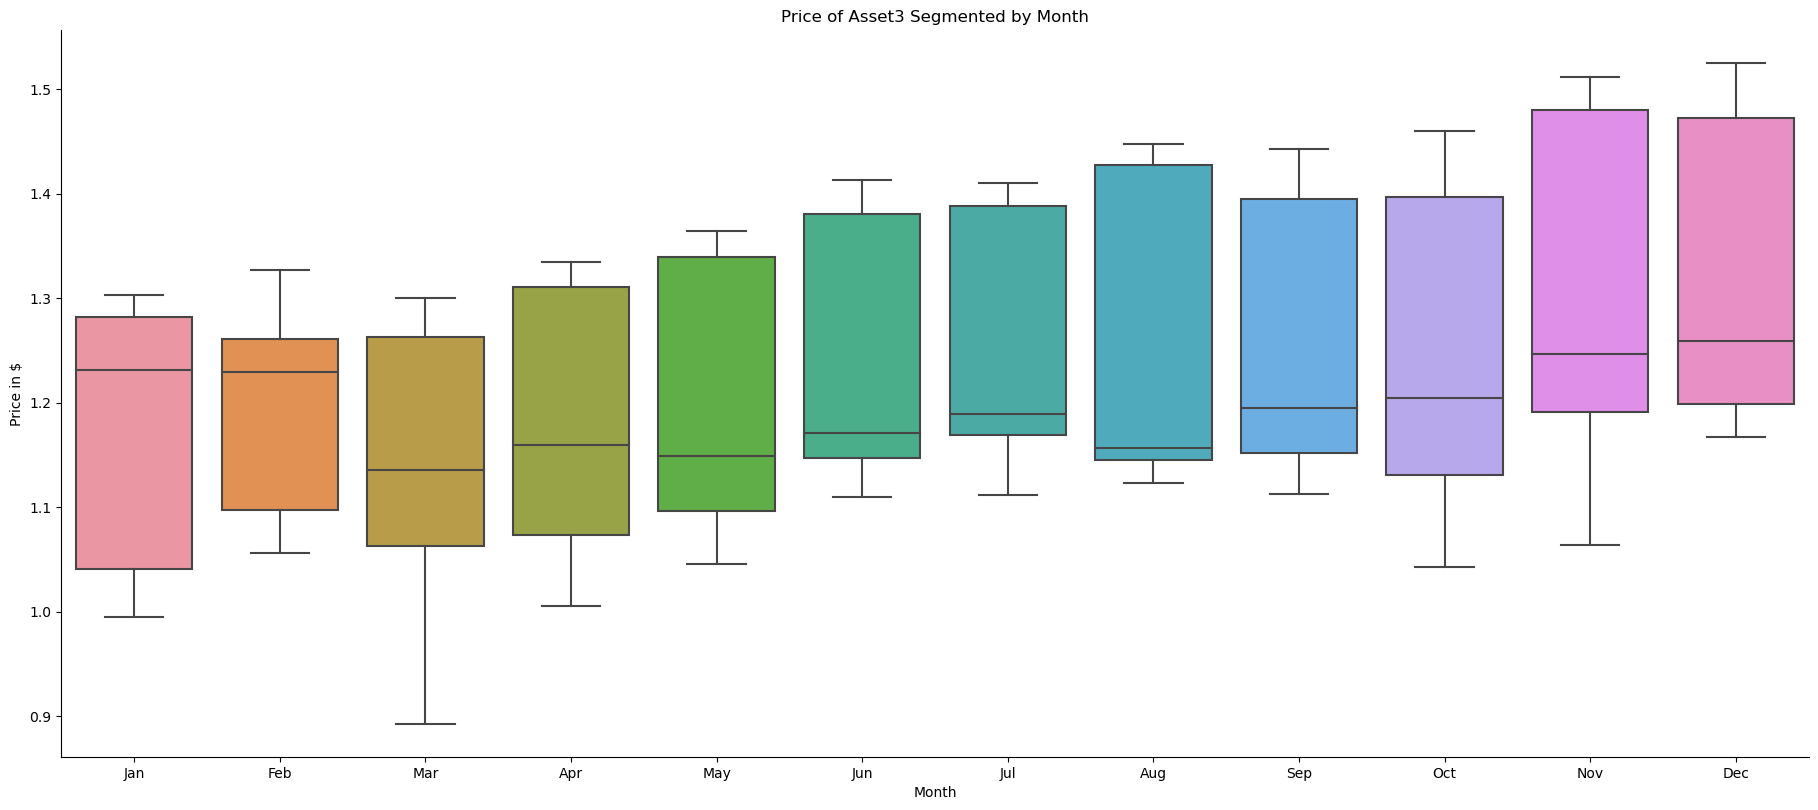

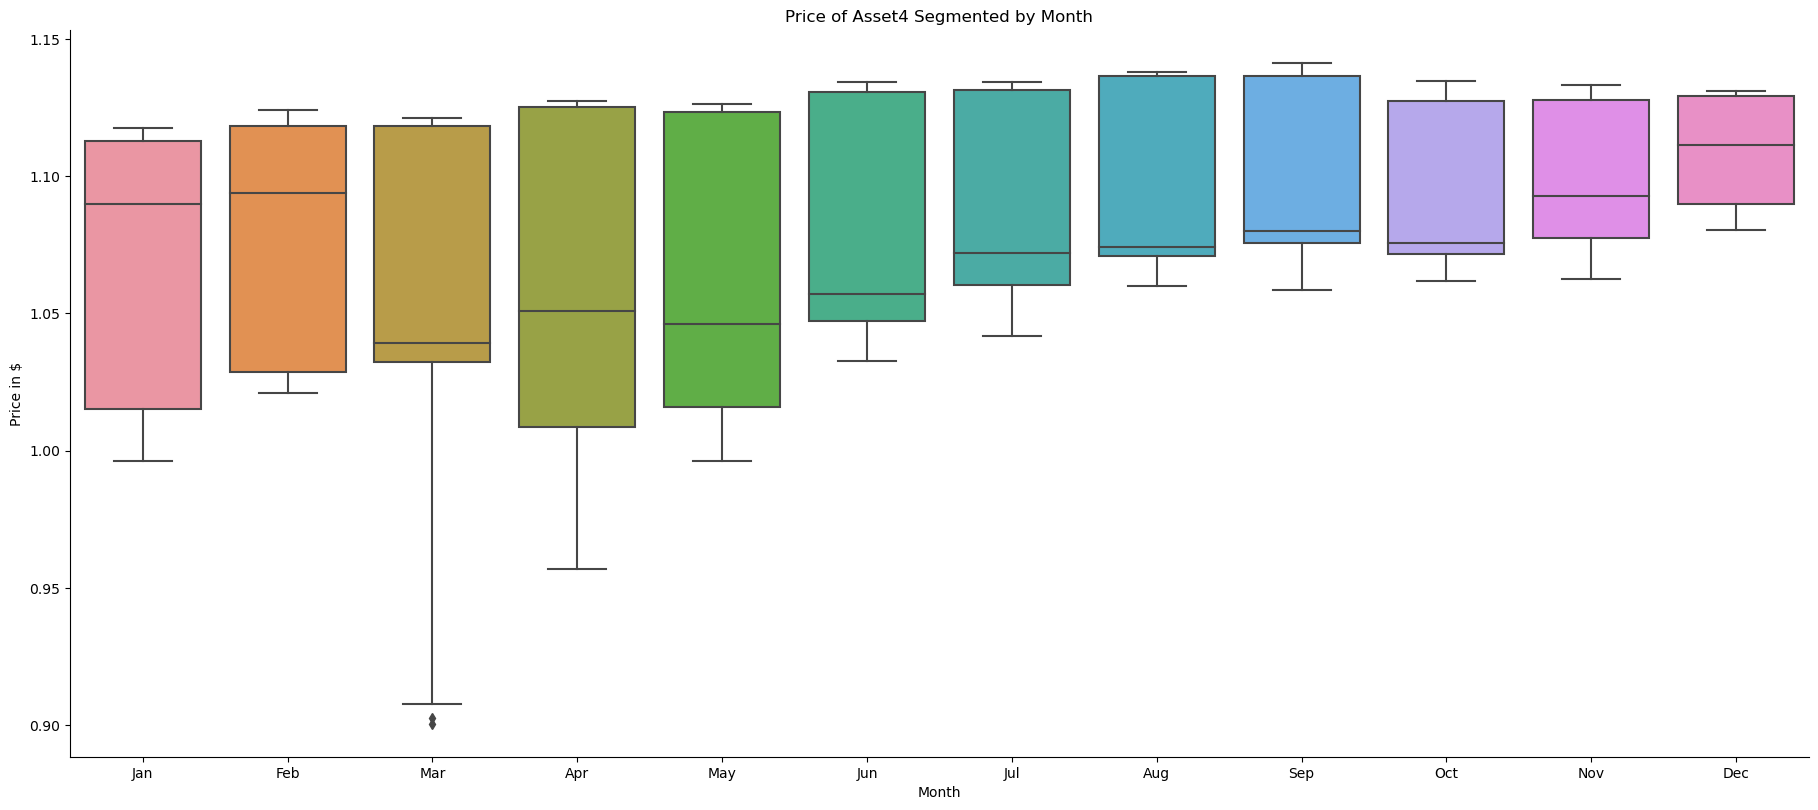

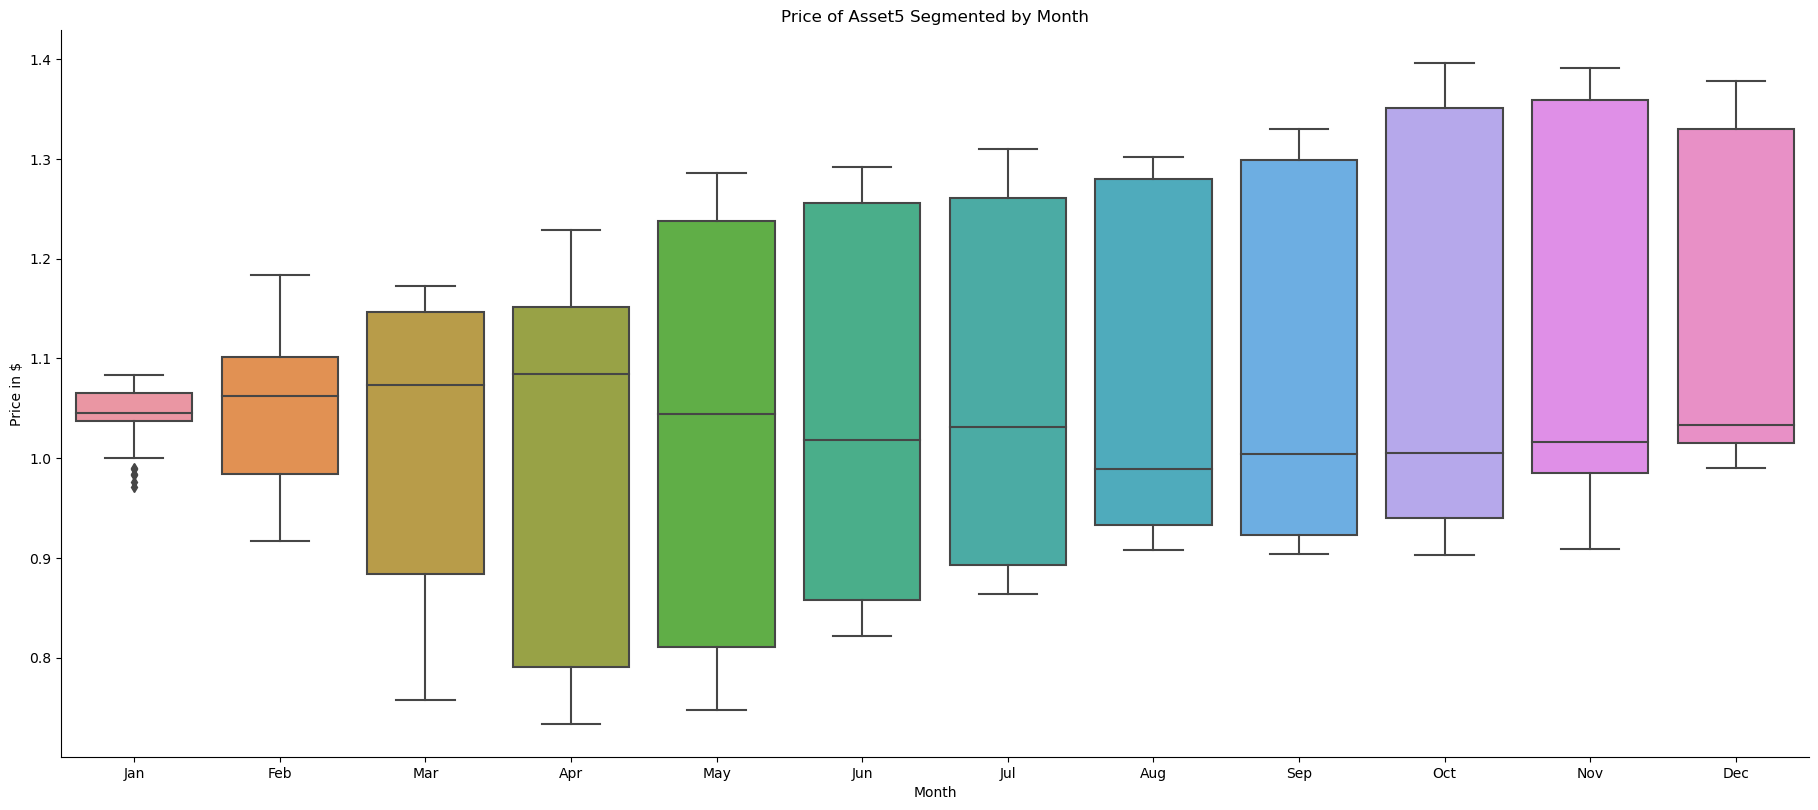

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the size of the plot
plt.figure(figsize=(16, 7))

# Iterate over each asset column (excluding 'year' and 'month' columns)
for asset in data_normalized.columns[:-2]:
    # Create a box plot for the current asset, segmented by month
    sns.catplot(x="month", y=asset, data=data_normalized, kind="box", order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], height=8, aspect=float(16/7))
    plt.xlabel("Month")
    plt.ylabel("Price in $")
    plt.title(f"Price of {asset} Segmented by Month")
    
plt.show()

<h2 style="color: #c200eb;">Insights from Box Plot:</h2>
There are fluctuations in Asset prices of different months.
The graph also shows outliers in Mar(Asset4) and Jan(Asset 5) which are represented by small dots.


<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>


<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [72]:
daily_returns_assets = df.pct_change()
daily_returns_assets.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192


<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [28]:
correlation_matrix = daily_returns.corr()
correlation_matrix

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.084049,-0.057886,0.101756,-0.107674
Asset2,-0.084049,1.000000,0.852533,0.527311,0.592160
Asset3,-0.057886,0.852533,1.000000,0.511723,0.557768
Asset4,0.101756,0.527311,0.511723,1.000000,0.421127
Asset5,-0.107674,0.592160,0.557768,0.421127,1.000000


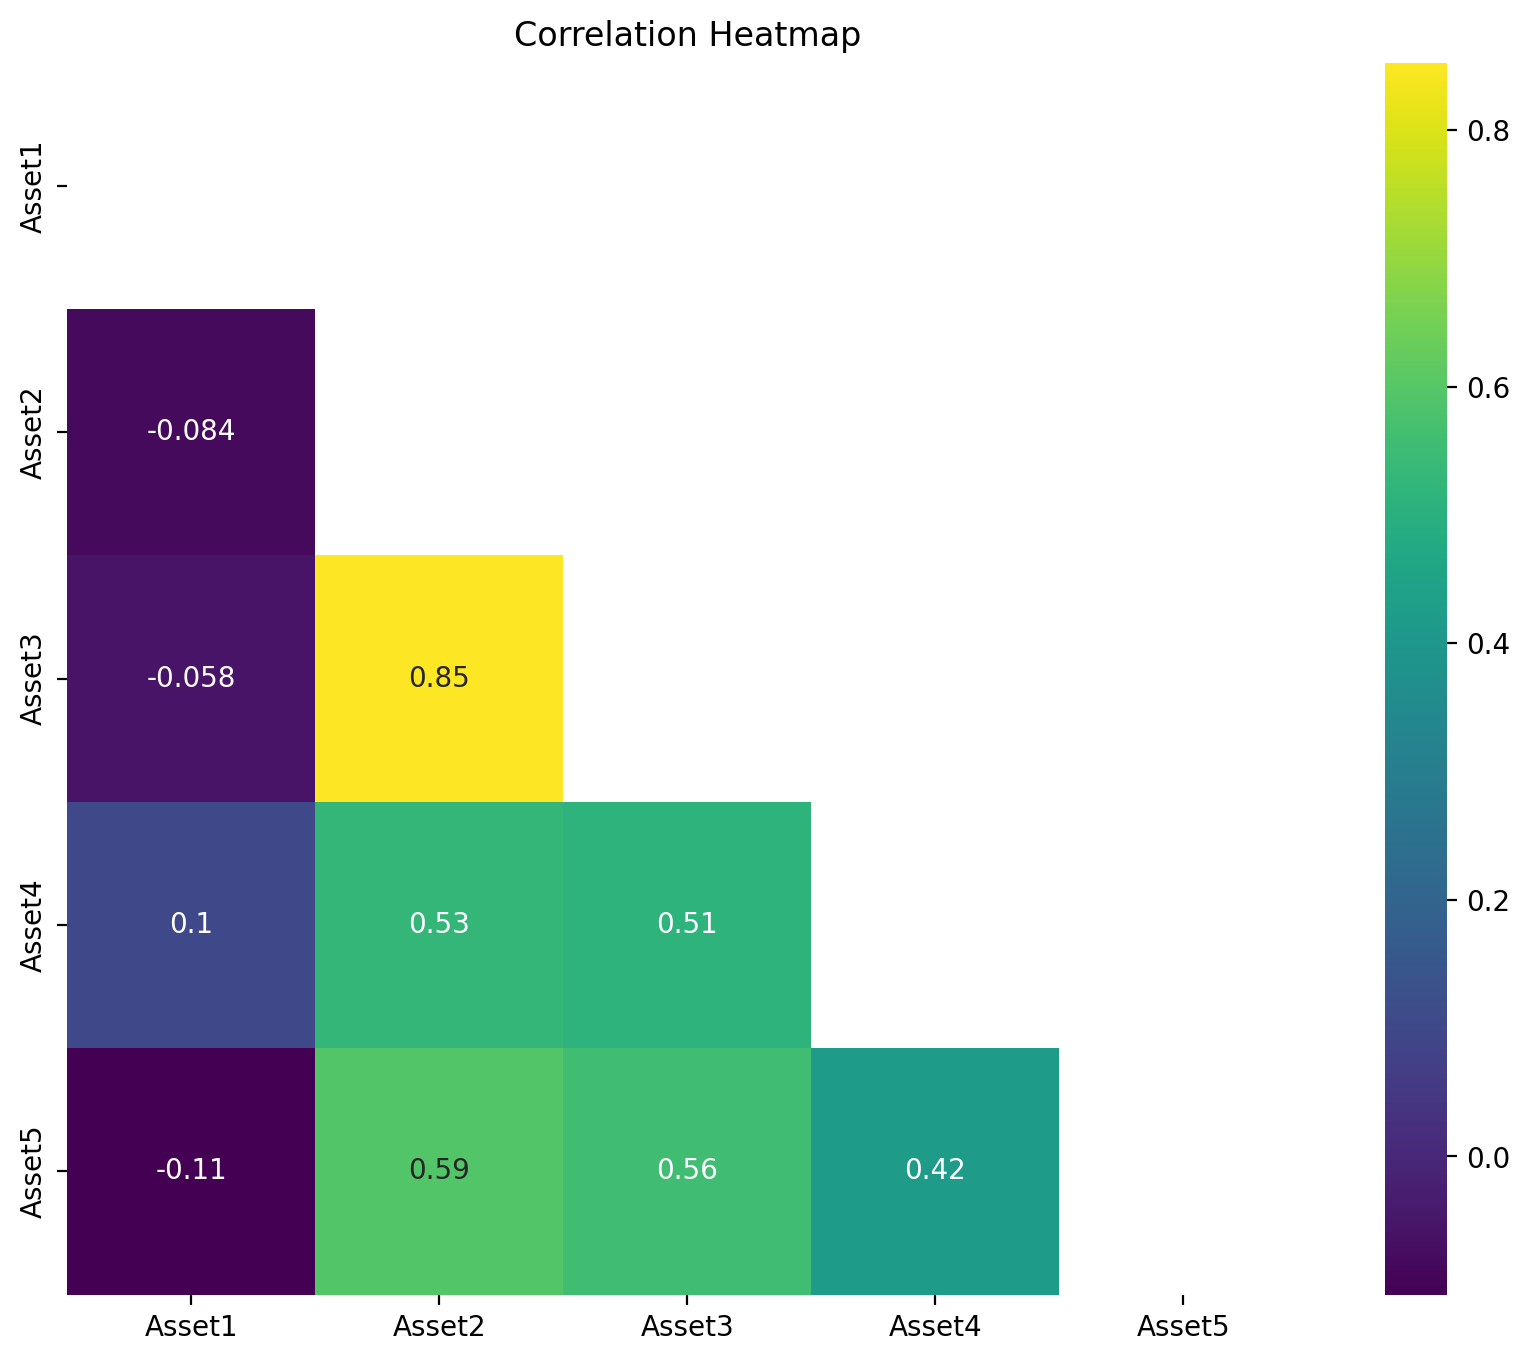

In [53]:
plt.figure(figsize=(10, 8),dpi=200)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<Figure size 1000x600 with 0 Axes>

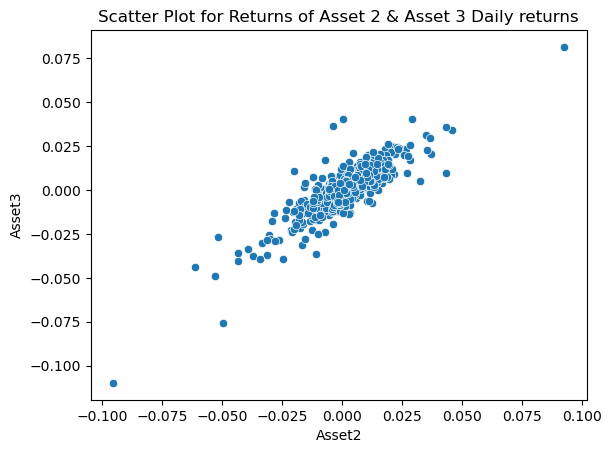

<Figure size 1000x600 with 0 Axes>

In [54]:
asset2_dr = daily_returns['Asset2']
asset3_dr = daily_returns['Asset3']
plt.title('Scatter Plot for Returns of Asset 2 & Asset 3 Daily returns')

sns.scatterplot(x= asset2_dr, y=asset3_dr)
plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

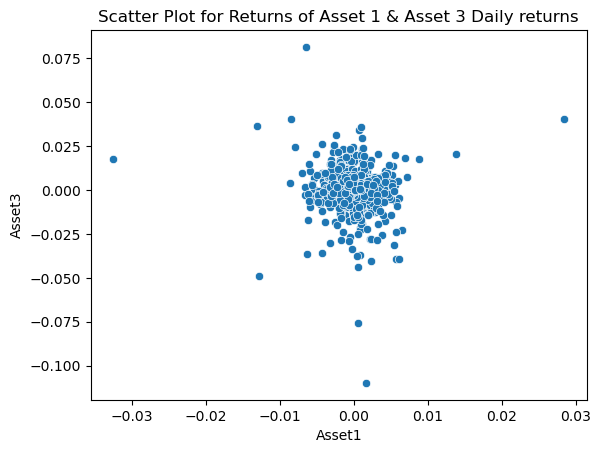

<Figure size 1000x600 with 0 Axes>

In [55]:
asset1_dr = daily_returns['Asset1']
asset3_dr = daily_returns['Asset3']
plt.title('Scatter Plot for Returns of Asset 1 & Asset 3 Daily returns')

sns.scatterplot(x= asset1_dr, y=asset3_dr)
plt.figure(figsize=(10,6))


<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [56]:
df_w = pd.read_csv("portfolio_weights.csv")
df_w.head(3)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974


In [57]:
df_w['date'] = pd.to_datetime(df_w['date'])
df_w.set_index('date', inplace=True)

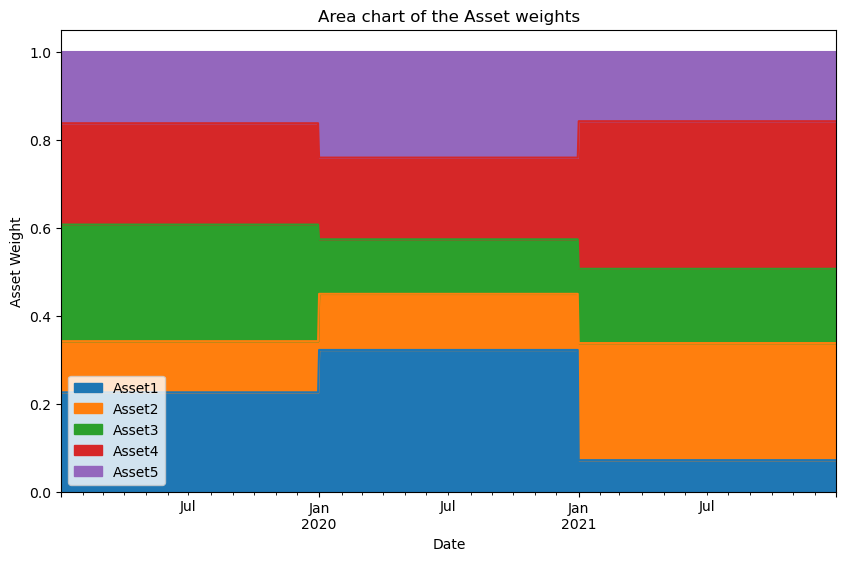

In [58]:
df_w.plot.area(figsize=(10, 6))

plt.title('Area chart of the Asset weights')
plt.xlabel('Date')
plt.ylabel('Asset Weight')
plt.legend(loc='lower left')
plt.show()

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [59]:
weights_returns = (daily_returns * df_w).sum(axis=1)

In [60]:
cumulative_returns = (1 + weights_returns).cumprod()

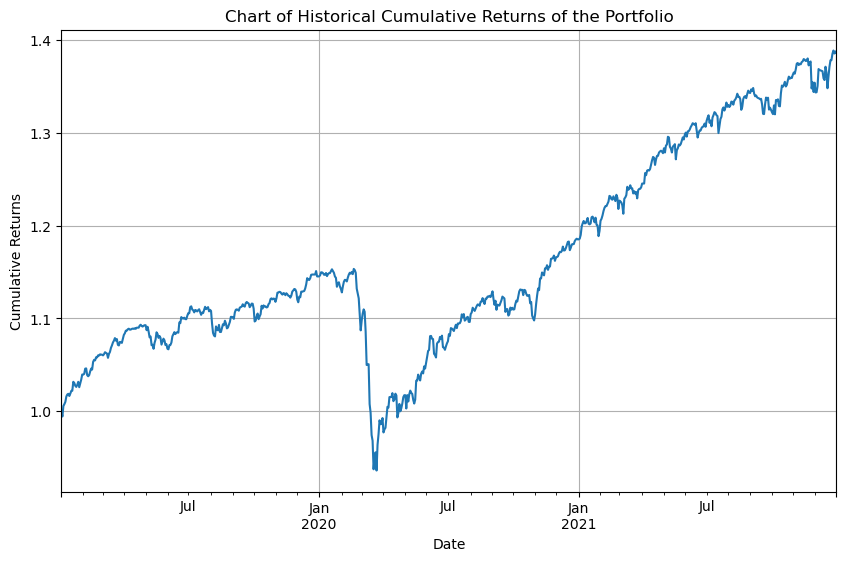

In [61]:
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title('Chart of Historical Cumulative Returns of the Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.grid(True)

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [62]:
portfolio_value_start = cumulative_returns.iloc[0]  # Initial portfolio value
portfolio_value_end = cumulative_returns.iloc[-1]  # Final portfolio value
total_return = (portfolio_value_end - portfolio_value_start) / portfolio_value_start

# Step 2: Determine the investment period
start_date = cumulative_returns.index[0]  # Start date of the investment
end_date = cumulative_returns.index[-1]   # End date of the investment
investment_period_days = (end_date - start_date).days
investment_period_years = investment_period_days / 365

# Step 3: Adjust to annual time
annualized_return = (((1 + total_return) ** (1 / investment_period_years)) - 1).round(2)

# Print the annualized return
print(f"Portfolio's Annual return: {annualized_return}")

Portfolio's Annual return: 0.12


<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

Annualized daily volatility is calculated by multiplying the standard deviation of a set of days returns by the square root of 261, which is the number of business days in a year. 

In [81]:
annualized_volatility = round(weights_returns .std() * (261 ** 0.5),4)
print(f"Annualized Volatility: {annualized_volatility}")

Annualized Volatility: 0.0851


<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [64]:
df_info = pd.read_csv("asset_information_data.csv")
df_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [65]:
df_w_family = pd.DataFrame(index=df_w.index)
df_w_family['Fixed Income'] = df_w['Asset1'] + df_w['Asset2']
df_w_family['Equity'] = df_w['Asset3'] + df_w['Asset4']
df_w_family['Alternative'] = df_w['Asset5']

In [66]:
df_w_family.head(3)

,Fixed Income,Equity,Alternative
date,,,
2019-01-02,0.341713,0.495313,0.162974
2019-01-03,0.341713,0.495313,0.162974
2019-01-04,0.341713,0.495313,0.162974


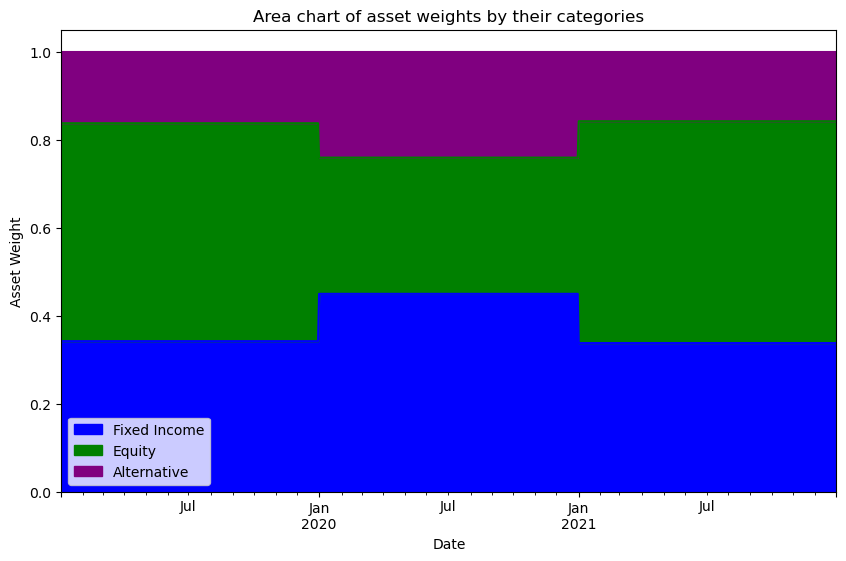

In [67]:
df_w_family.plot.area(figsize=(10, 6),color=['blue', 'green','purple'])

plt.title('Area chart of asset weights by their categories')
plt.xlabel('Date')
plt.ylabel('Asset Weight')
plt.show()